# Tension Modulated String

[1] Trautmann, Rabenstein, Sound Synthesis with Tension Modulated
Nonlinearities Based on Functional Transformations
AMTA 2000, Jamaica

R. Rabenstein, 27.03.2022

Python Translation: S. Schlecht

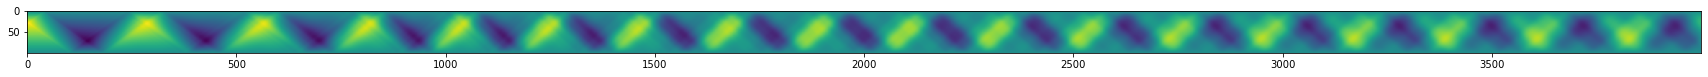

In [20]:
from tensionModulatedString_solver import TensionModulatedString
import numpy as np
from numpy import sin, cos, conj, cumsum, real

tensionString = TensionModulatedString()
xe_rel = 0.28 # pluck position relative to string lengths 
hi  = 0.03         # m             initial deflection at pluck position
wb0 = tensionString.create_pluck(xe_rel,hi)
t1, y1 = tensionString.solve(wb0)


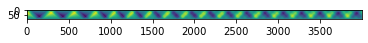

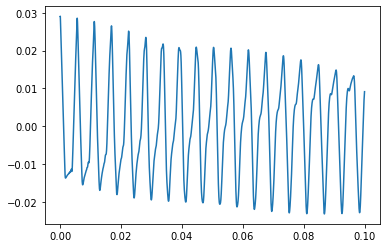

In [23]:
from matplotlib import pyplot as plt
# plt.plot(t1,y1)
plt.figure()
plt.imshow(y1.transpose(), interpolation='nearest')

plt.figure()
plt.plot(t1,y1[:,30])


In [ ]:
# import IPython.display as ipd
# # Sound output
# y = real(y) 
# y = y/max(y)
# ipd.Audio(y, rate=waveSolver2D.Fs) # load a NumPy array